## Stock Market Analysis of Tesla, Ford, GM 2012-2017

In [1]:
#Aquiring data for the stock prices of 3 different companies Tesla, GM and Ford
#Manipulate and Visualise the data in order to study them and draw various conclusions 
#Processing, Manipulating and Visualising

In [2]:
#importing the various libraries we are going to need for this coursework
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing pandas_datareader to obtain the historical stock information online 
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [4]:
#initialising the timeline end and start we are going to be using
start = datetime.datetime(2012,1,1)
close = datetime.datetime(2017,1,1)

In [5]:
start

datetime.datetime(2012, 1, 1, 0, 0)

In [6]:
#if we don't have api or unlimited uses from Quandl or 
#if the web.DataReader isn't working or is giving us the wrong results just import the files
#google doesnt work anymore so use yahoo or idx to get the relevant sto prices
#tesla = web.DataReader('TSL','yahoo', start='2012-1-1',end='2017-1-1')
import quandl
#tesla = quandl.get("WIKI/TSLA", start_date='2012-1-1',end_date='2017-1-1')
tesla = pd.read_csv('Tesla_Stock.csv')
tesla.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,28.94,29.50,27.65,28.08,928052
1,2012-01-04,28.21,28.67,27.50,27.71,630036
2,2012-01-05,27.76,27.93,26.85,27.12,1005432
3,2012-01-06,27.20,27.79,26.41,26.89,687081
4,2012-01-09,27.00,27.49,26.12,27.25,896951


In [7]:
#ford = web.DataReader('F','yahoo', start='2012-1-1',end='2017-1-1')
#google doesn't work anymore so use yahoo or idx
#ford = quandl.get("WIKI/Ford", start_date='2012-1-1',end_date='2017-1-1')
ford = pd.read_csv('Ford_Stock.csv')
ford.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,11.00,11.25,10.99,11.13,45709811
1,2012-01-04,11.15,11.53,11.07,11.30,79725188
2,2012-01-05,11.33,11.63,11.24,11.59,67877467
3,2012-01-06,11.74,11.80,11.52,11.71,59840605
4,2012-01-09,11.83,11.95,11.70,11.80,53981467


In [8]:
#gm = web.DataReader('GM','yahoo', start='2012-1-1',end='2017-1-1')
#gm = quandl.get("WIKI/GM", start_date='2012-1-1',end_date='2017-1-1')
gm = pd.read_csv('GM_Stock.csv')
gm.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,20.83,21.18,20.75,21.05,9321420
1,2012-01-04,21.05,21.37,20.75,21.15,7856752
2,2012-01-05,21.10,22.29,20.96,22.17,17884040
3,2012-01-06,22.26,23.03,22.24,22.92,18234608
4,2012-01-09,23.20,23.43,22.70,22.84,12091714


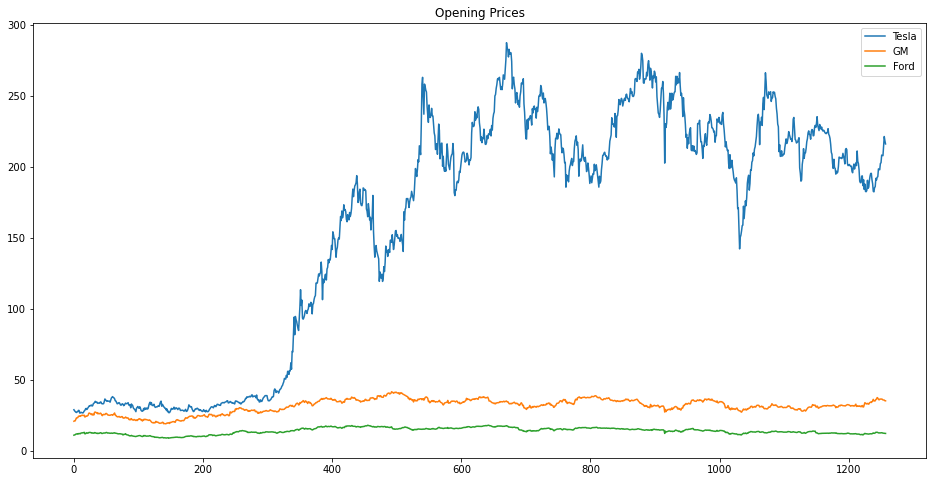

In [9]:
#let's check the opening prices during the period 2012 until 2017 for each of those companies and plot them
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()
#linear plot of all the stocks' Open prices for each company

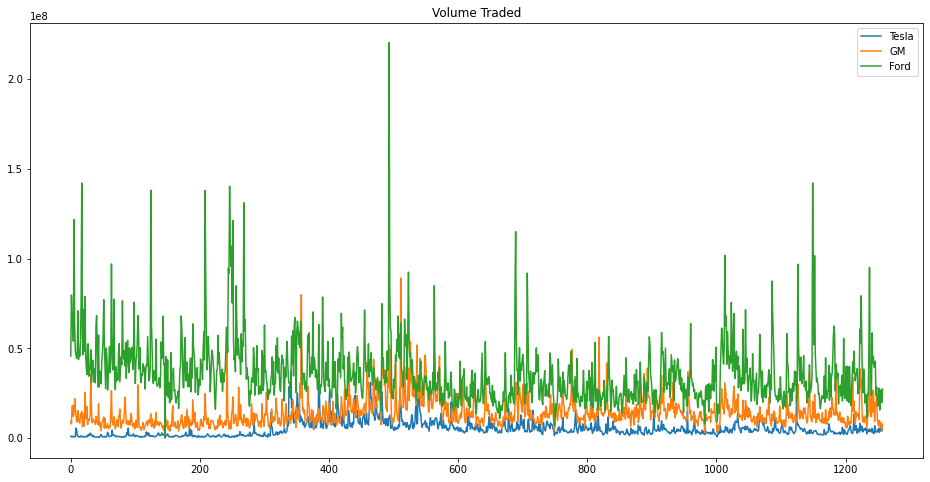

In [10]:
#now let's check the volume of the stocks traded during that period for each of those companies and plot them
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();
#Visualisation of the data with legends of the volume traded of the stocks of each company vs Time.

In [11]:
#Interesting, looks like Ford had a really big spike somewhere in late 2013.
#What was the date of this maximum trading volume for Ford?

In [12]:
ford["Volume"].idxmax()

493

In [13]:
ford['Volume'].argmax()

493

In [14]:
ford['Date'][493]

'2013-12-18'

In [15]:
# What happened:
# http://money.cnn.com/2013/12/18/news/companies/ford-profit/
# https://www.usatoday.com/story/money/cars/2013/12/18/ford-2014-profit-warning/4110015/
# https://media.ford.com/content/dam/fordmedia/North%20America/US/2014/01/28/4QFinancials.pdf

#googled the date + company, ford in this case
#Aggressive Ford plans to hit profits, shares fall
#Ford shares fell sharply Wednesday after the company warned the cost of its aggressive push to launch new products would cut into profits next year.


<AxesSubplot:>

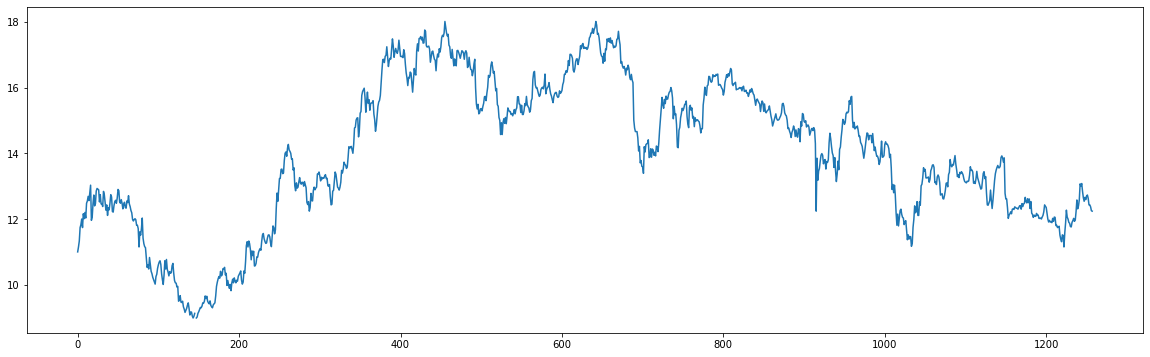

In [16]:
ford['Open'].plot(figsize=(20,6))
#the spike is not noticable that much here.
#previously we were looking at the volume now these are the opening prices so there was a drop but not that big.

<AxesSubplot:>

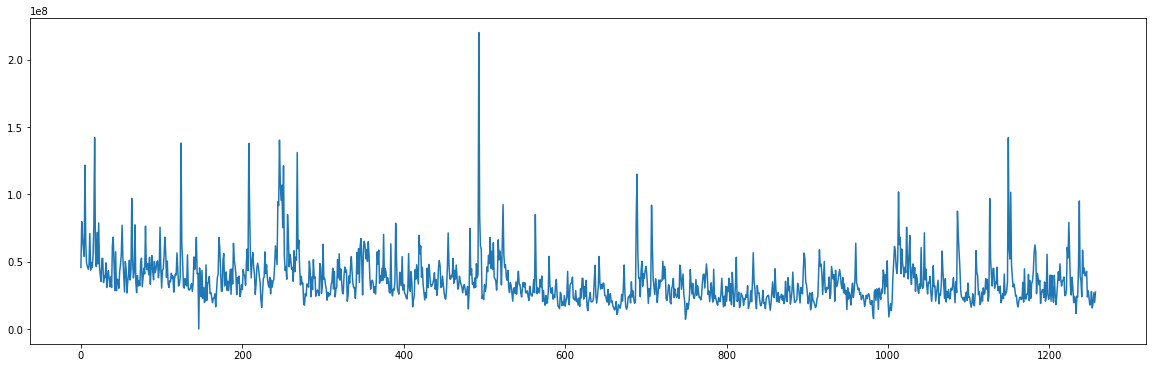

In [17]:
ford['Volume'].plot(figsize=(20,6))
#having a closer look only on the ford stock volume traded

In [18]:
#Te Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford.
#But to really understand this we would need to look at the total market cap of the company, not just the stock price. 
#Unfortunately our current data doesn't have that information of total units of stock present. 
#But what we can do as a simple calcualtion is to try to represent the total money traded as a roguh estimate of
#the Volume column multiplied by the Open price. 
#Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money 
#being traded around using the time series at that time, roughly.

In [19]:
#Market Cap = Stock Price x How many available units of stock are available.
#To find this we multiply the volume column with the opening price. 
#This is not the actual market cap but just a visualization of the total amount of money being traded.
#This is how much money is actually being traded for each of these companies on these given days.

tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']
#create a new column in each dataframe with values from the open and volume column multiplied together

Text(0, 0.5, 'Total Traded')

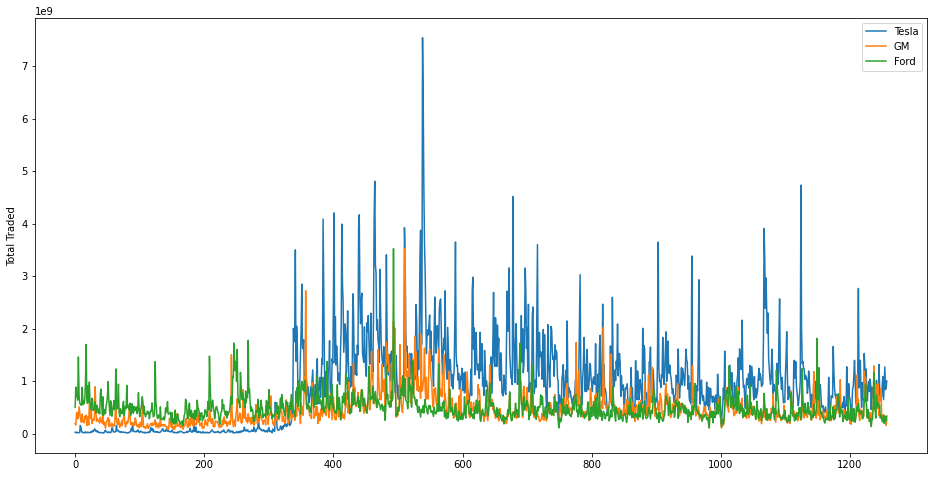

In [20]:
#plotting them to check the graph
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

In [21]:
#The columns we created were a rough estimate of the total money being traded each day for each of these companies. 
#If we wanted to improve the estimate we could average the open and closing value of the stock each day.


In [22]:
#As we can see for Tesla there are quite a bit more money being traded around, especially in certain years when it was 
#being shorted a lot for various reasons. 
#But Tesla has huge fluctuations in terms of its stock price overall.
#Looks like there was a huge amount of money traded for tesla somewhere in early 2014. What date was that and what happened?

In [23]:
tesla['Total Traded'].argmax()

538

In [24]:
tesla['Date'][538]

'2014-02-25'

In [25]:
# http://money.cnn.com/2014/02/25/investing/tesla-record-high/
# https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/
# https://www.washingtonpost.com/news/wonk/wp/2014/02/25/teslas-stock-is-up-644-why-it-may-not-last/
# http://www.cnbc.com/2014/02/25/tesla-soars-ford-falls-in-consumer-reports-study.html

#What happened
#tesla shares surge on Morgan Stanley report. So essentially what happened is some Morgan Stanley analyst gave a good 
#report on Tesla shares that caused a huge spike that day.

<AxesSubplot:>

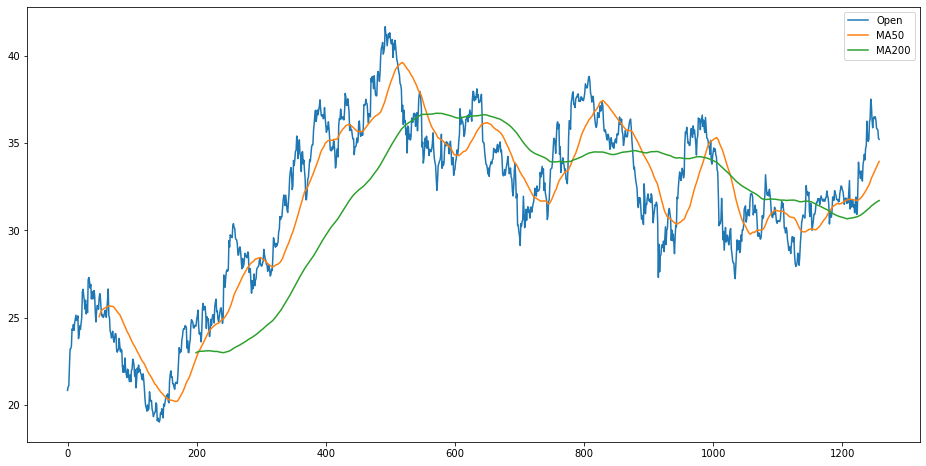

In [26]:
#Now lets plot some MA (Moving Averages) regarding GM. Plot out the MA50 and MA200 for GM.
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(figsize = (16,8))


In [27]:
#Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. 
#We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a 
#scatter matrix plot of all the stocks'opening price. We might need to rearrange the columns into a new single dataframe.
# https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot
from pandas.plotting import scatter_matrix

In [28]:
#concatinating the open columns of each of the companies
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.head()

,Open,Open,Open
0,28.94,20.83,11.00
1,28.21,21.05,11.15
2,27.76,21.10,11.33
3,27.20,22.26,11.74
4,27.00,23.20,11.83


In [29]:
#remaining the columns
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

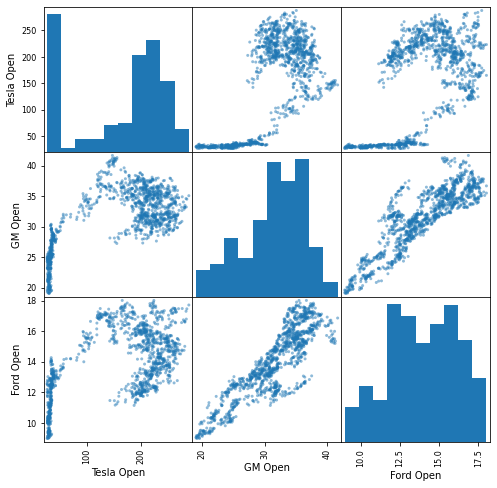

In [30]:
scatter_matrix(car_comp,figsize=(8,8))

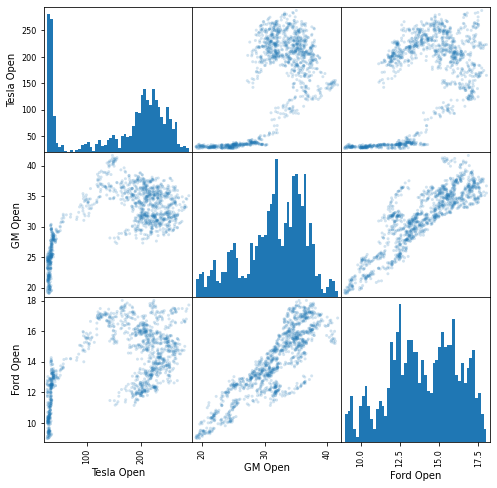

In [31]:
#Using a semi-colon to remove the axes print outs
#making the graphs visually better
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});
#hist_kwds = dictionary specifying the number of bins

In [32]:
#We can see that there is a clear positive correlation between general motors and ford
#tesla is quite different,this is because tesla has a huge fluctuation in stock price, while GM and ford kind of stayed at 
#the same level in comparison, they are most stable

## Let's now create a candlestick chart!

In [33]:
import mplfinance as mpf
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [34]:
ford.head()

,Date,Open,High,Low,Close,Volume,Total Traded
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08
3,2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08
4,2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08


In [35]:
ford['Date'] = pd.to_datetime(ford['Date'])
#convert to datetime format

In [36]:
ford.head(3)
#checking

,Date,Open,High,Low,Close,Volume,Total Traded
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08


In [37]:
ford = ford.set_index('Date')

In [38]:
ford.head(3)

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08


In [39]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1257 non-null   float64
 1   High          1257 non-null   float64
 2   Low           1257 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Total Traded  1257 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [40]:
ford_reset = ford.loc['2012-01':'2012-01'].reset_index()
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          20 non-null     datetime64[ns]
 1   Open          20 non-null     float64       
 2   High          20 non-null     float64       
 3   Low           20 non-null     float64       
 4   Close         20 non-null     float64       
 5   Volume        20 non-null     int64         
 6   Total Traded  20 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.2 KB


In [41]:
# Create a new column of numerical "date" values for matplotlib to use
# makes the date_ax value is a numerical value
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

In [42]:
#ford_reset.head()
#ford_values

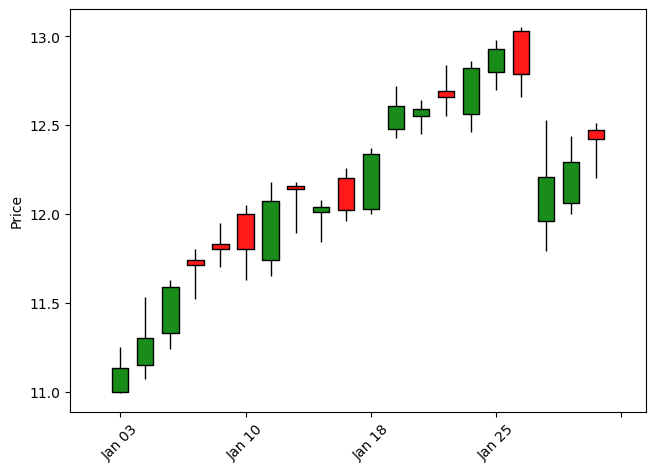

In [43]:
ford = ford[['Open','High','Low','Close']].loc['2012-01']

mc = mpf.make_marketcolors(up='g', down='r')
s  = mpf.make_mpf_style(marketcolors=mc)

mpf.plot(ford, type='candle', style = s)

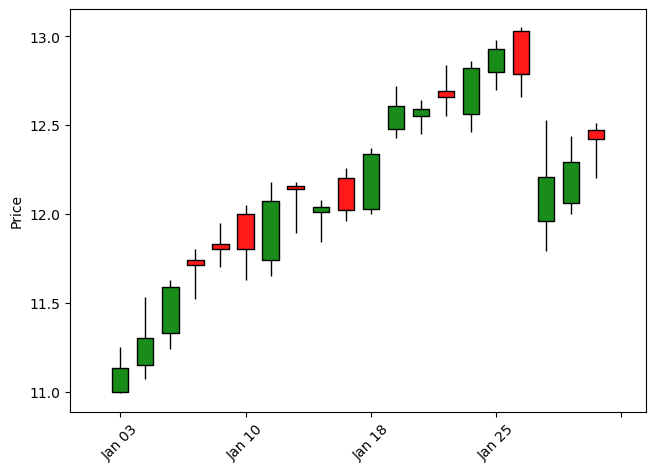

In [44]:
mpf.plot(ford.head(20),type='candle',style=s)

## Daily Percentage Change
First lets begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:


$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

Creating a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either using a simple calculation using the .shift() method that follows the formula above, or using pandas' built in pct_change method.

In [45]:
#we have r of t that is the return at time time which is equal to the price at time t divided by the price at time t-1 ,
#which is the previous day and then minus 1 of that result.
#so this is the percentage gain or loss in a few words, if you buy a stock on day 1 and sold it at day number 2 then 
#divide the differece and do minus one thats your gain or loss.
#So you can imagine that if you have a very stable stock, that is the price day to day doesn't change that much.
#Then your volatility is low and your return tends to be close to zero. So you can imagine that a stock that never 
#changes price such as price on day one was one hundred price on day two was one hundred price on day three was 
#one hundred, the most stable it could ever be. That means that this return is going to be zero because you'd 
#have a hundred divided by 100 would be one and then one minus one is zero. So your daily return would be 
#zero if you had a completely flat line, stable stock.You can imagine, though, if your price fluctuates wildly, then this 
#value is going to get larger, whether it's large negative number or a large positive number, 
#depending on whether you're gaining or you're losing. #So if you were to plot this out with a histogram and you had 
#a really wide distribution, that is the X axis went really low and really high, then your stock is more volatile from 
#one day to the next.If you have a very narrow distribution that is centered and close around zero, 
#that means you have a relatively stable stock.

In [46]:
# Method 1: Using shift
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [47]:
tesla.head()
#the first returns value is nan due to our calculation, there is no previous number

,Date,Open,High,Low,Close,Volume,Total Traded,returns
0,2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
1,2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2,2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
3,2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
4,2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [48]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [49]:
tesla['returns'].head()
#if you are loosing money its going to be -ve and if you are gaining money its going to be +ve

0         NaN
1   -0.013177
2   -0.021292
3   -0.008481
4    0.013388
Name: returns, dtype: float64

In [50]:
#resetting the dataframe of ford due to previous manipulation of the dataframe
ford = pd.read_csv('Ford_Stock.csv')

gm['returns'] = (gm['Close'] / gm['Close'].shift(1) ) - 1
ford['returns'] = (ford['Close'] / ford['Close'].shift(1) ) - 1
# Now repeat for the ford and gm
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [51]:
gm.head()

,Date,Open,High,Low,Close,Volume,Total Traded,MA50,MA200,returns
0,2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
1,2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2,2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
3,2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
4,2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


Now lets plot a histogram of each companies returns. We can either do them separately, or stack them on top of each other. 
Lets find which stock is the most "volatile"? (as judged by the variance in the daily returns)

<AxesSubplot:>

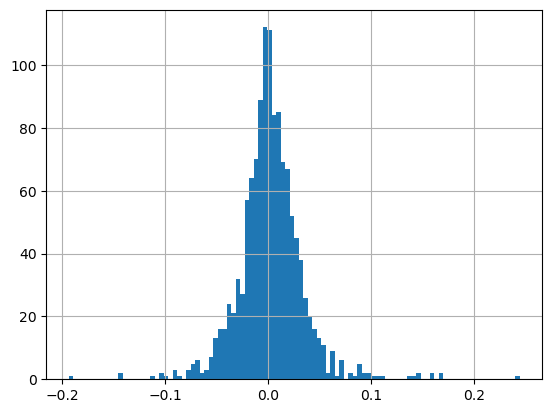

In [52]:
tesla['returns'].hist(bins=100)

<AxesSubplot:>

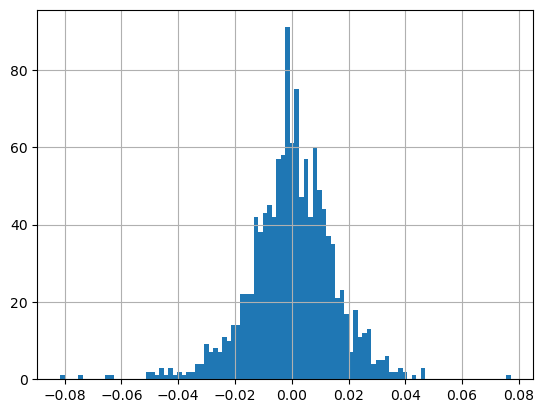

In [53]:
ford['returns'].hist(bins=100)

<AxesSubplot:>

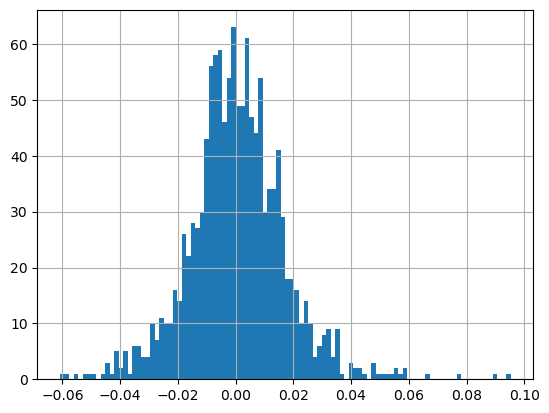

In [54]:
gm['returns'].hist(bins=100)

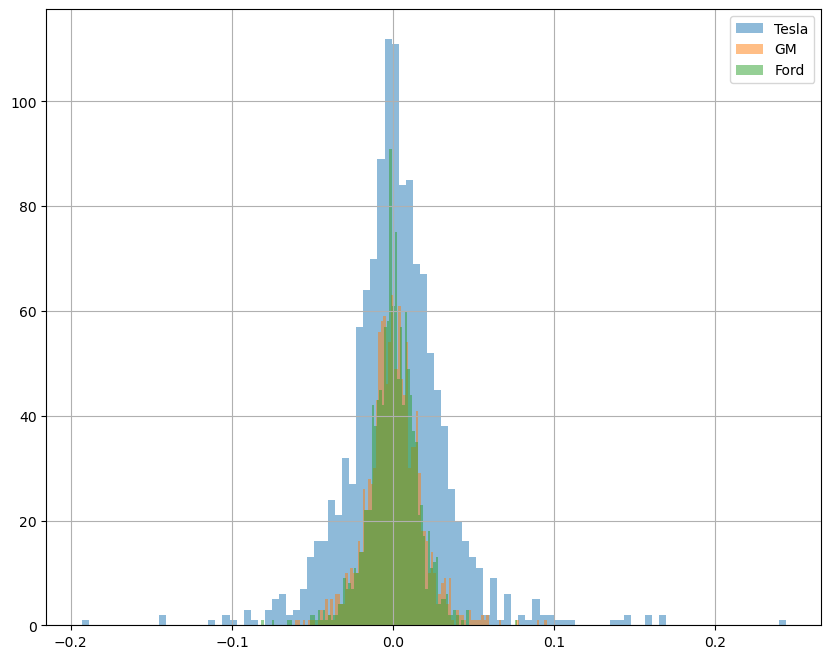

In [55]:
#plotting them all together
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

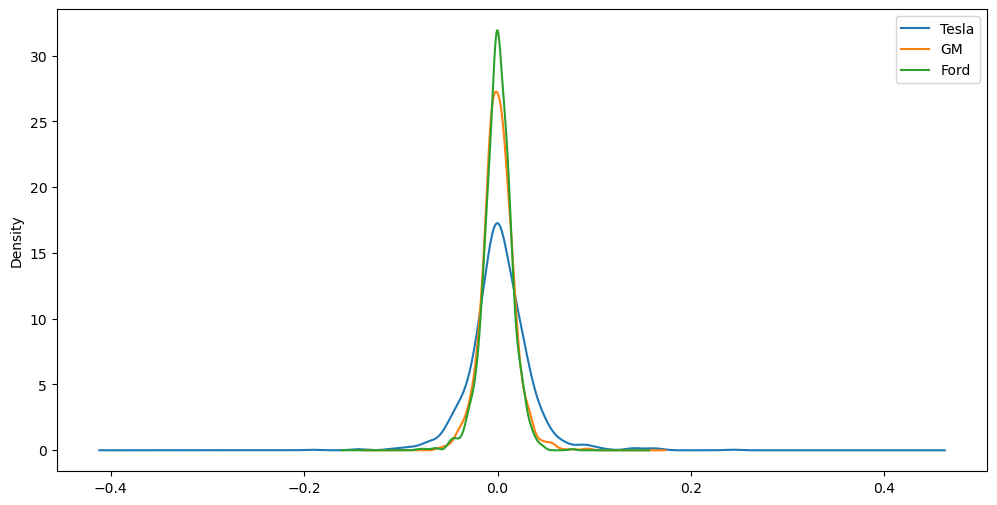

In [56]:
#Lets also plot a KDE instead of histograms for another view point. Maybe we can find which stock has the widest plot.
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

In [57]:
#now that we see the kernel density estimation plot and here the actual distributions are more clear
#We can see ford clearly peaking much more stable than the other 2 companies
#its way more stable than tesla and abit more stable than gm 
#it has a higher peak centered at 0
#tesla is more wider than the other 2 companies meaning that there is more volatility in the stock price

Lets create some box plots to compare the returns.

<AxesSubplot:>

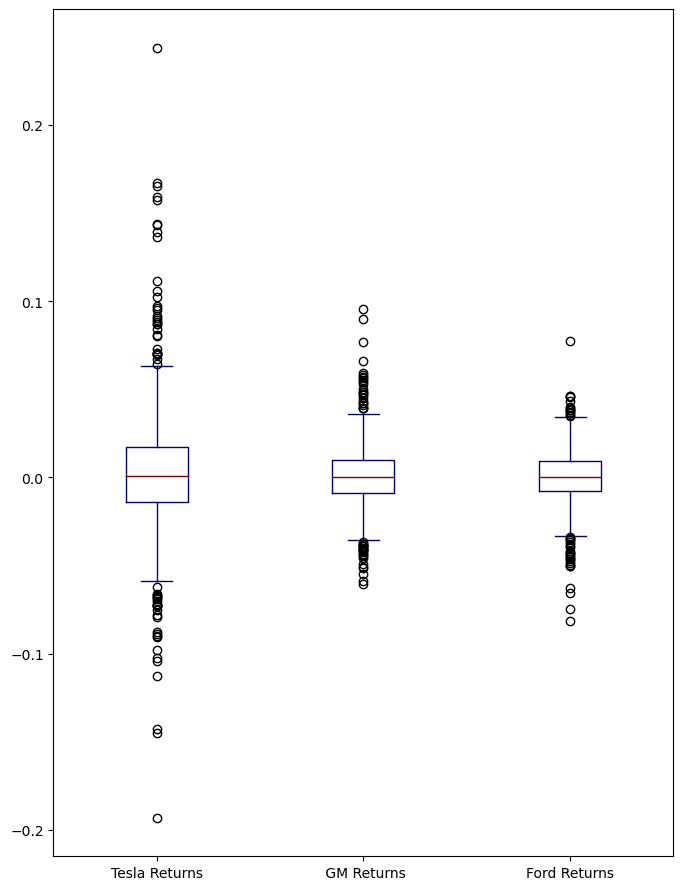

In [58]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

In [59]:
#We can clearly see here that tesla returns quite abit more of a wider distribution, with alot more outliers.
#Ford is the most stable again verifying our previous results.

Lets now compare the Daily Returns between Stocks by creating a scatter matrix plot to see the correlation between each of the stocks daily returns. This will help us answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?

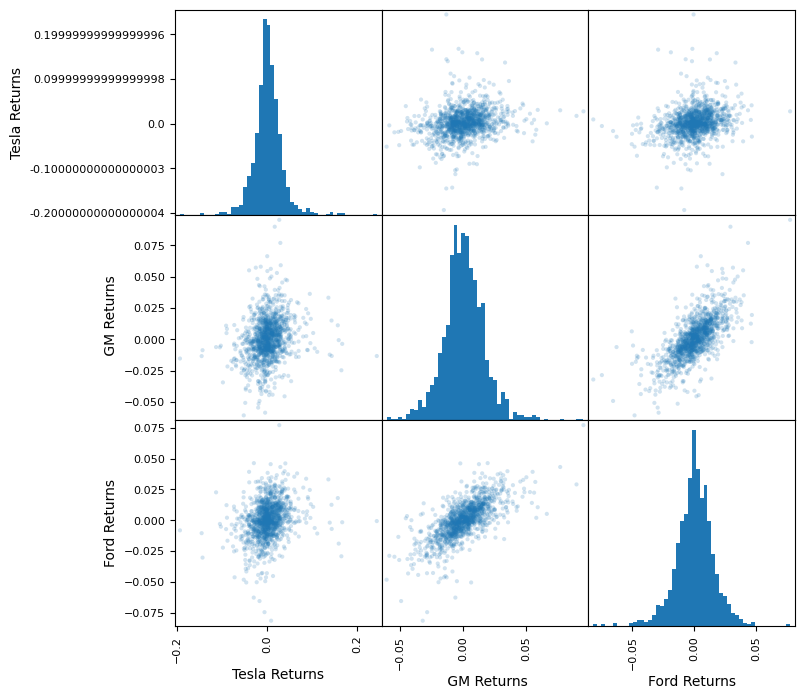

In [60]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [61]:
#we can again see similar results, ford and gm tend to be correlated together and then tesla not so much between gm and ford
#lets plot gm and ford together then and see more clearly in a scatter plot!

<AxesSubplot:xlabel=' GM Returns', ylabel='Ford Returns'>

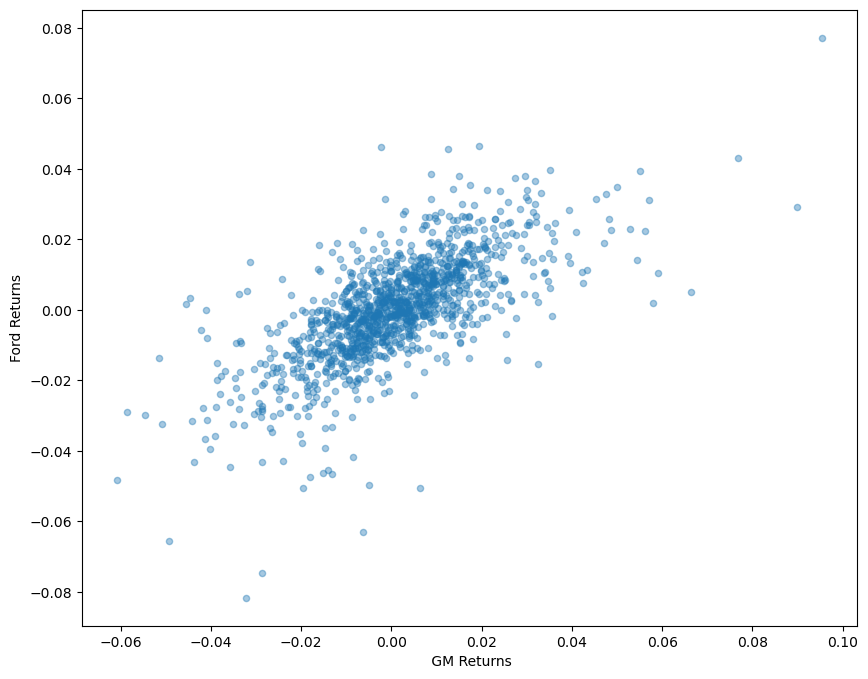

In [62]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

In [63]:
#general motor returns vs ford returns
#they seem to have a linear regression pattern
#we can just draw a line in the middle and say that they have some sort of linear relationship
#as ford returns get higher so do gm returns and as ford returns get negative gm returns get negative

Cumulative returns:
A cumulative return is the aggregate amount and investment has gained or lost over time, independent of the period of time involved.
So this is a little bit different than just the stock price of the current day, because it's going to take into account the daily returns. Now, keep in mind the simple calculation that we're going to be showing here doesn't take into account stocks that give back a dividend.

In [64]:
#While daily returns are useful, it doesn't really give the investor an immediate insight into the gains that he or she had made
#till the current date, especially if the stock is very volatile. So a cumulative return is computed relative 
#to the day the investment was actually made, if cumulative return is above one, you're making a profit, otherwise you're 
#still in the loss.

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [65]:
#so lets create a cumulative daily return column for each car company's dataframe.
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()
#returns the cumulative productive on the corresponding axis, in this case default
tesla
#below 1 is loss in the Cumulative return column
#in row 4 we have positive returns (0.013388) which is above 0 but cumulative returns is still below 1 so overall its a loss.

,Date,Open,High,Low,Close,Volume,Total Traded,returns,Cumulative Return
0,2012-01-03,28.94,29.50,27.65,28.08,928052,2.685782e+07,NaN,NaN
1,2012-01-04,28.21,28.67,27.50,27.71,630036,1.777332e+07,-0.013177,0.986823
2,2012-01-05,27.76,27.93,26.85,27.12,1005432,2.791079e+07,-0.021292,0.965812
3,2012-01-06,27.20,27.79,26.41,26.89,687081,1.868860e+07,-0.008481,0.957621
4,2012-01-09,27.00,27.49,26.12,27.25,896951,2.421768e+07,0.013388,0.970442
...,...,...,...,...,...,...,...,...,...
1253,2016-12-23,208.00,213.45,207.71,213.34,4670464,9.714565e+08,0.023459,7.597578
1254,2016-12-27,214.88,222.25,214.42,219.53,5915732,1.271172e+09,0.029015,7.818020
1255,2016-12-28,221.53,223.80,217.20,219.74,3782456,8.379275e+08,0.000957,7.825499
1256,2016-12-29,218.56,219.20,214.12,214.68,4044968,8.840682e+08,-0.023027,7.645299


In [66]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()
ford.head()

,Date,Open,High,Low,Close,Volume,returns,Cumulative Return
0,2012-01-03,11.00,11.25,10.99,11.13,45709811,NaN,NaN
1,2012-01-04,11.15,11.53,11.07,11.30,79725188,0.015274,1.015274
2,2012-01-05,11.33,11.63,11.24,11.59,67877467,0.025664,1.041330
3,2012-01-06,11.74,11.80,11.52,11.71,59840605,0.010354,1.052111
4,2012-01-09,11.83,11.95,11.70,11.80,53981467,0.007686,1.060198


In [70]:
tesla = tesla.set_index('Date')
gm = gm.set_index('Date')
ford = ford.set_index('Date')

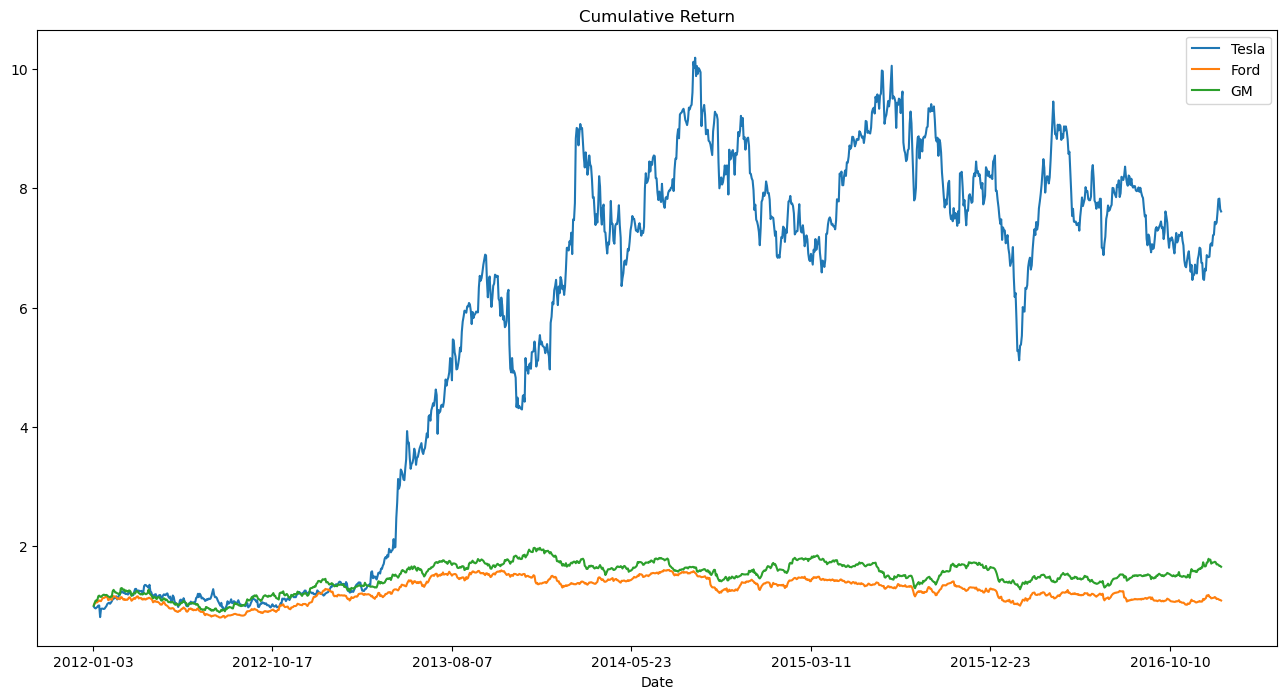

In [71]:
#lets now plot the Cumulative returns of each company against the time index
#this way we can see which showed the highest return for one dollar invested and which showed the lowest
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()

In [68]:
#clearly tesla had the highest culumative return compared to gm and ford, as expected.
#we can also see that ford's and gm's culumative returns are close with gm's abit higher, again, as expected.
#ford had the lowest culumative return at the end of 2017 

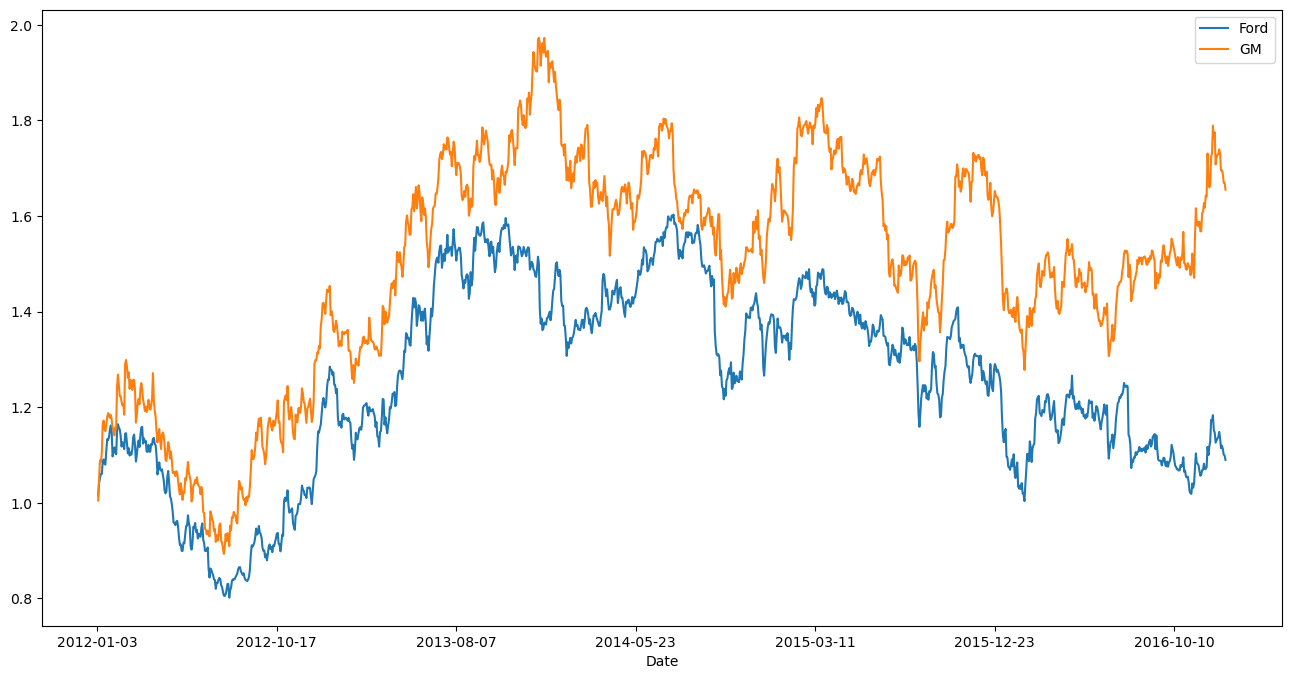

In [73]:
#removing Tesla from the plot so we can examine the other two companies closely
ford['Cumulative Return'].plot(label='Ford', figsize = (16,8))
gm['Cumulative Return'].plot(label='GM')
plt.legend()